# <font color=blue>Machine Learning with the Experts School Budgets</font> 
Data science isn't just for predicting ad-clicks-it's also useful for social impact! This course is a case study from a machine learning competition on DrivenData. You'll explore a problem related to school district budgeting. By building a model to automatically classify items in a school's budget, it makes it easier and faster for schools to compare their spending with other schools. In this course, you'll begin by building a baseline model that is a simple, first-pass approach. In particular, you'll do some natural language processing to prepare the budgets for modeling. Next, you'll have the opportunity to try your own techniques and see how they compare to participants from the competition. Finally, you'll see how the winner was able to combine a number of expert techniques to build the most accurate model.

## <font color=red>01 - Exploring the raw data </font> 
 In this chapter, you'll be introduced to the problem you'll be solving in this course. How do you accurately classify line-items in a school budget based on what that money is being used for? You will explore the raw text and numeric values in the dataset, both quantitatively and visually. And you'll learn how to measure success when trying to predict class labels for each row of the dataset. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

<div class="dc-u-p-24"><h1 class="dc-h3">What category of problem is this?</h1><div class=""><p><p>You're no novice to data science, but let's make sure we agree on the basics.</p>
<p>As Peter from <a href="https://www.drivendata.org/" target="_blank" rel="noopener noreferrer">DrivenData</a> explained in the video, you're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. <code>Function: Career &amp; Academic Counseling</code>, or <code>Position_Type: Librarian</code>.</p>
<p>Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.</p>
<p>What type of machine learning problem is this?</p></div></div>

#### Supervised Learning, because the model will be trained using labeled examples.

<div class="dc-u-p-24"><h1 class="dc-h3">What is the goal of the algorithm?</h1><div class=""><p><p>As you know from previous courses, there are different types of supervised machine learning problems. In this exercise you will tell us what type of supervised machine learning problem this is, and why you think so.</p>
<p>Remember, your goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.</p></div></div>

#### Classification, because predicted probabilities will be used to select a label class.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Loading the data</h1><div class=""><p><p>Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as <code>pd</code>) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.</p>
<p>The training data is available as <code>TrainingData.csv</code>. Your first task is to load it into a DataFrame in the IPython Shell using <code>pd.read_csv()</code> along with the keyword argument <code>index_col=0</code>.</p>
<p>Use methods such as <code>.info()</code>, <code>.head()</code>, and <code>.tail()</code> to explore the budget data and the properties of the features and labels.</p>
<p>Some of the column names correspond to <strong>features</strong> - descriptions of the budget items - such as the <code>Job_Title_Description</code> column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.</p>
<p>Some columns correspond to the budget item <strong>labels</strong> you will be trying to predict with your model. For example, the <code>Object_Type</code> column describes whether the budget item is related classroom supplies, salary, travel expenses, etc. </p>
<p>Use <code>df.info()</code> in the IPython Shell to answer the following questions:</p>
<ul>
<li>How many rows are there in the training data?</li>
<li>How many columns are there in the training data?</li>
<li>How many non-null entries are in the <code>Job_Title_Description</code> column?</li>
</ul></div></div>

#### 1560 rows, 26 columns, 1131 non-null entries in Job_Title_Description.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Summarizing the data</h1><div class=""><p><p>You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called <code>df</code>.</p>
<p>You can use <code>df.info()</code> in the IPython Shell to determine which columns of the data are numeric, specifically type <code>float64</code>. You'll notice that there are two numeric columns, called <code>FTE</code> and <code>Total</code>.</p>
<ul>
<li><code>FTE</code>: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.</li>
<li><code>Total</code>: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.</li>
</ul>
<p>After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null <code>FTE</code> column to see the distribution of part-time and full-time employees in the dataset.</p></div></div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [3]:
df = pd.read_csv("./data/a.csv", sep=";", index_col=0)

In [4]:
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
no,,,,,,,,,,,,,,,,,,,,,
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8.290000e+09,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,6.180000e+08,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,4.980000e+10,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.020000e+06,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2.300000e+09,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


In [5]:
df.FTE.describe()

count    449.000000
mean       0.493365
std        0.452651
min       -0.002369
25%        0.004310
50%        0.440000
75%        1.000000
max        1.000000
Name: FTE, dtype: float64

In [6]:
df.describe()

,FTE,Total
count,449.000000,1.542000e+03
mean,0.493365,1.447254e+10
std,0.452651,7.915691e+10
min,-0.002369,-1.040000e+12
25%,0.004310,1.110000e+08
50%,0.440000,7.060000e+08
75%,1.000000,5.345000e+09
max,1.000000,1.370000e+12


In [7]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

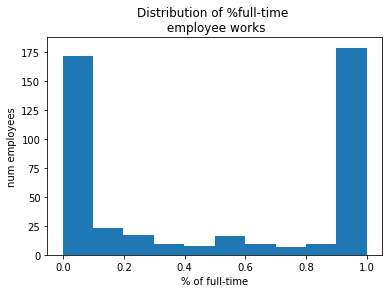

In [8]:
# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Exploring datatypes in pandas</h1><div class=""><p><p>It's always good to know what datatypes you're working with, especially when the inefficient pandas type <code>object</code> may be involved. Towards that end, let's explore what we have.</p>
<p>The data has been loaded into the workspace as <code>df</code>. Your job is to look at the DataFrame attribute <code>.dtypes</code> in the IPython Shell, and call its <code>.value_counts()</code> method in order to answer the question below.</p>
<p>Make sure to call <code>df.dtypes.value_counts()</code>, and not <code>df.value_counts()</code>! Check out the difference in the Shell. <code>df.value_counts()</code> will return an error, because it is a <em>Series</em> method, not a <em>DataFrame</em> method. </p>
<p>How many columns with dtype <code>object</code> are in the data?</p></div></div></div>

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Encode the labels as categorical variables</h1><div class=""><p><p>Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient <code>object</code> type. Does this include the labels you're trying to predict? Let's find out!</p>
<p>There are 9 columns of labels in the dataset. Each of these columns is a category that has <a href="https://www.drivendata.org/competitions/4/box-plots-for-education/page/15/#labels_list" target="_blank" rel="noopener noreferrer">many possible values it can take</a>. The 9 labels have been loaded into a list called <code>LABELS</code>. In the Shell, check out the type for these labels using <code>df[LABELS].dtypes</code>.</p>
<p>You will notice that every label is encoded as an object datatype. Because <code>category</code> datatypes are <a href="https://www.continuum.io/content/pandas-categoricals" target="_blank" rel="noopener noreferrer">much more efficient</a> your task is to convert the labels to category types using the <code>.astype()</code> method.</p>
<p>Note: <code>.astype()</code> only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the <code>.apply()</code> method and provide a <code>lambda</code> function called <code>categorize_label</code> that applies <code>.astype()</code> to each column, <code>x</code>.</p></div></div></div>

In [9]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [10]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Counting unique labels</h1><div class=""><p><p>As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.</p>
<p>The dataframe <code>df</code> and the <code>LABELS</code> list have been loaded into the workspace; the <code>LABELS</code> columns of <code>df</code> have been converted to category types.</p>
<p>pandas, which has been pre-imported as <code>pd</code>, provides a <code>pd.Series.nunique</code> method for counting the number of unique values in a Series.</p></div></div></div>

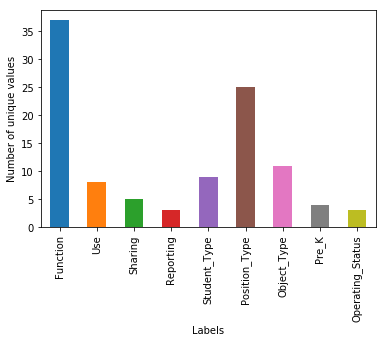

In [11]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

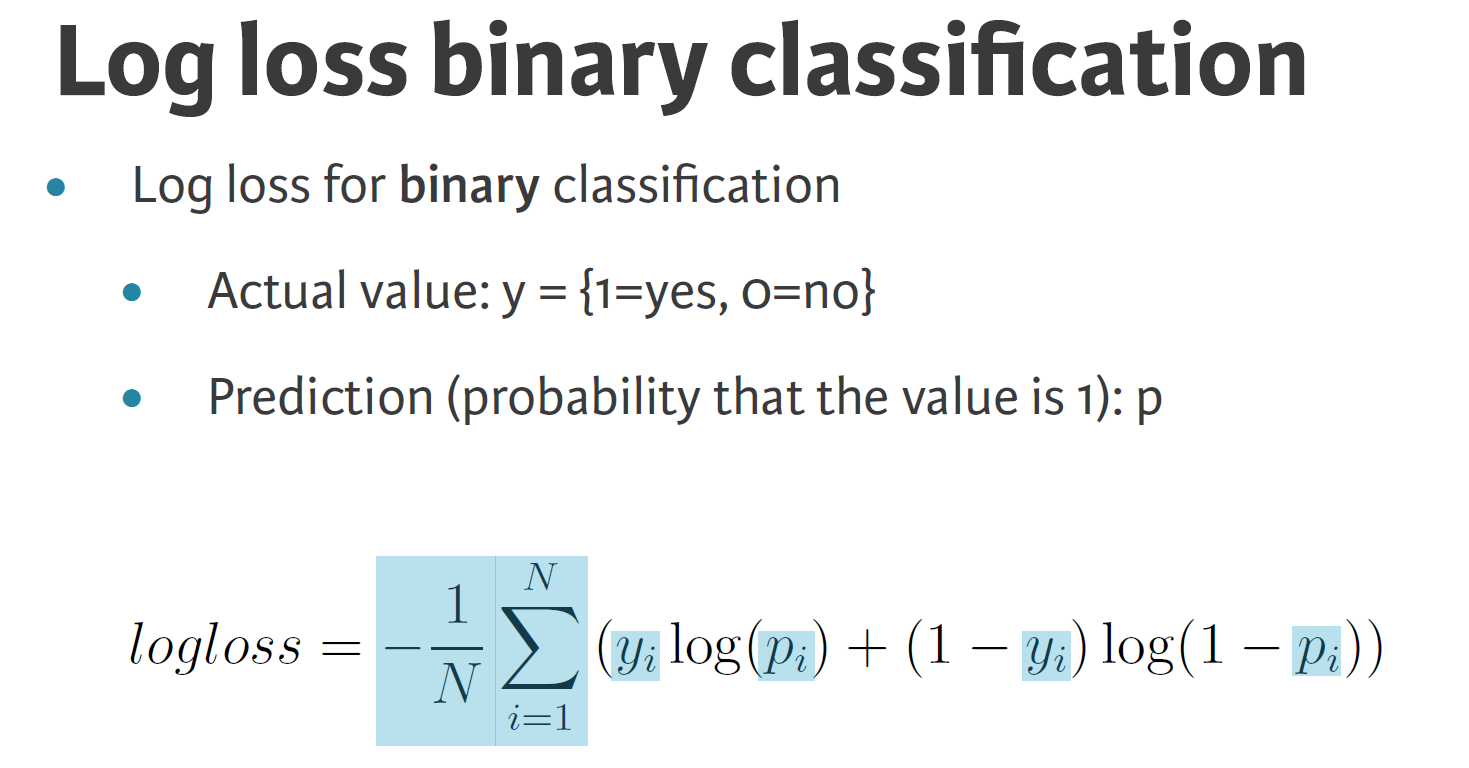

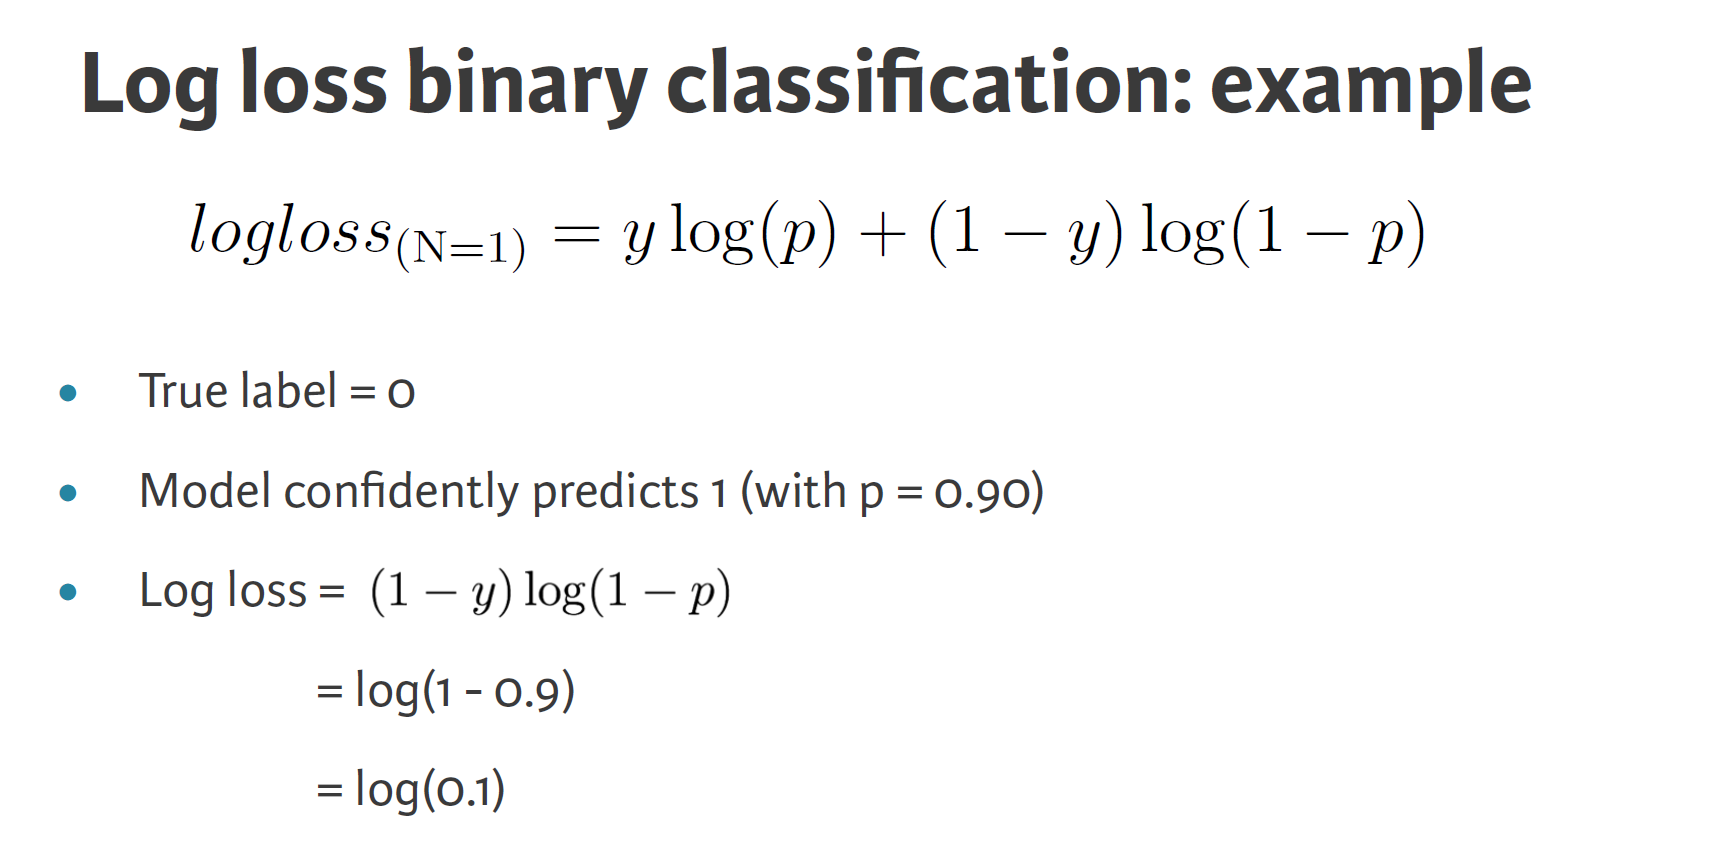

<div class="dc-u-p-24"><h1 class="dc-h3">Penalizing highly confident wrong answers</h1><div class=""><p><p>As Peter explained in the video, log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class.</p>
<p>Suppose you have the following 3 examples:</p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>A</mi><mo>:</mo><mi>y</mi><mo>=</mo><mn>1</mn><mo>,</mo><mi>p</mi><mo>=</mo><mn>0.85</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 9.351em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.959em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.474em, 1007.91em, 2.716em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="mi" id="MathJax-Span-3" style="font-family: MathJax_Math; font-style: italic;">A</span><span class="mo" id="MathJax-Span-4" style="font-family: MathJax_Main; padding-left: 0.278em;">:</span><span class="mi" id="MathJax-Span-5" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.278em;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span><span class="mo" id="MathJax-Span-6" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-7" style="font-family: MathJax_Main; padding-left: 0.278em;">1</span><span class="mo" id="MathJax-Span-8" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-9" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.167em;">p</span><span class="mo" id="MathJax-Span-10" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-11" style="font-family: MathJax_Main; padding-left: 0.278em;">0.85</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 1.203em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>A</mi><mo>:</mo><mi>y</mi><mo>=</mo><mn>1</mn><mo>,</mo><mi>p</mi><mo>=</mo><mn>0.85</mn></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-1">A: y=1, p=0.85 </script></p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>B</mi><mo>:</mo><mi>y</mi><mo>=</mo><mn>0</mn><mo>,</mo><mi>p</mi><mo>=</mo><mn>0.99</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-12" style="width: 9.351em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.959em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1007.92em, 2.716em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-13"><span class="mi" id="MathJax-Span-14" style="font-family: MathJax_Math; font-style: italic;">B</span><span class="mo" id="MathJax-Span-15" style="font-family: MathJax_Main; padding-left: 0.278em;">:</span><span class="mi" id="MathJax-Span-16" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.278em;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span><span class="mo" id="MathJax-Span-17" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-18" style="font-family: MathJax_Main; padding-left: 0.278em;">0</span><span class="mo" id="MathJax-Span-19" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-20" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.167em;">p</span><span class="mo" id="MathJax-Span-21" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-22" style="font-family: MathJax_Main; padding-left: 0.278em;">0.99</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 1.164em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>B</mi><mo>:</mo><mi>y</mi><mo>=</mo><mn>0</mn><mo>,</mo><mi>p</mi><mo>=</mo><mn>0.99</mn></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-2">B: y=0, p=0.99 </script></p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>C</mi><mo>:</mo><mi>y</mi><mo>=</mo><mn>0</mn><mo>,</mo><mi>p</mi><mo>=</mo><mn>0.51</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-23" style="width: 9.351em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.959em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1007.89em, 2.716em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-24"><span class="mi" id="MathJax-Span-25" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span><span class="mo" id="MathJax-Span-26" style="font-family: MathJax_Main; padding-left: 0.278em;">:</span><span class="mi" id="MathJax-Span-27" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.278em;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.006em;"></span></span><span class="mo" id="MathJax-Span-28" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-29" style="font-family: MathJax_Main; padding-left: 0.278em;">0</span><span class="mo" id="MathJax-Span-30" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-31" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.167em;">p</span><span class="mo" id="MathJax-Span-32" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-33" style="font-family: MathJax_Main; padding-left: 0.278em;">0.51</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 1.19em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>C</mi><mo>:</mo><mi>y</mi><mo>=</mo><mn>0</mn><mo>,</mo><mi>p</mi><mo>=</mo><mn>0.51</mn></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-3">C: y=0, p=0.51 </script></p>
<p>Select the ordering of the examples which corresponds to the lowest to highest log loss scores. <code>y</code> is an indicator of whether the example was classified correctly. You shouldn't need to crunch any numbers!</p></div></div>

#### Lowest: A, Middle: C, Highest: B.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Computing log loss with NumPy</h1><div class=""><p><p>To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function <code>compute_log_loss()</code>, which Peter showed you in the video.</p>
<p>5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: <code>actual_labels</code>, <code>correct_confident</code>, <code>correct_not_confident</code>, <code>wrong_not_confident</code>, and <code>wrong_confident</code>.</p>
<p>Your job is to compute the log loss for each sample set provided using the <code>compute_log_loss(predicted_values, actual_values)</code>. It takes the predicted values as the first argument and the actual values as the second argument.</p></div></div>

In [12]:
import numpy as np
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
    actual when these are 1D arrays.
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our
    predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
    + (1 - actual)
    * np.log(1 - predicted))
    return loss

In [13]:
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95]) 

In [14]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident,actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


 Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models. You rock!

## <font color=red>02 - Creating a simple first model</font> 

In [15]:
from multilabel import *

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Setting up a train-test split in scikit-learn</h1><div class=""><p><p>Alright, you've been patient and awesome. It's finally time to start training models! </p>
<p>The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least <code>min_count</code> examples of each label appear in each split: <code>multilabel_train_test_split</code>.</p>
<p>Feel free to check out the full code for <code>multilabel_train_test_split</code> <a href="https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/data/multilabel.py" target="_blank" rel="noopener noreferrer">here</a>.</p>
<p>You'll start with a simple model that uses <strong>just the numeric columns</strong> of your DataFrame when calling <code>multilabel_train_test_split</code>. The data has been read into a DataFrame <code>df</code> and a list consisting of just the numeric columns is available as <code>NUMERIC_COLUMNS</code>.</p></div></div>

In [16]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [17]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 198 to 305347
Data columns (total 2 columns):
FTE      1035 non-null float64
Total    1035 non-null float64
dtypes: float64(2)
memory usage: 24.3+ KB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 209 to 101861
Data columns (total 2 columns):
FTE      525 non-null float64
Total    525 non-null float64
dtypes: float64(2)
memory usage: 12.3+ KB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 198 to 305347
Columns: 105 entries, Function_Aides Compensation to Operating_Status_perating, Not PreK-12
dtypes: uint8(105)
memory usage: 114.2+ KB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 209 to 101861
Columns: 105 entries, Function_Aides Compensation to Operating_Status_perating, Not PreK-12
dtypes: uint8(105)
memory usage: 57.9+ KB
None


<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Training a model</h1><div class=""><p><p>With split data in hand, you're only a few lines away from training a model.</p>
<p>In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the <code>NUMERIC_COLUMNS</code> of your feature data.</p>
<p>Then you'll test and print the accuracy with the <code>.score()</code> method to see the results of training. </p>
<p><strong>Before you train!</strong> Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.</p>
<p>All data necessary to call <code>multilabel_train_test_split()</code> has been loaded into the workspace.</p></div></div></div>

In [18]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


Ok! The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

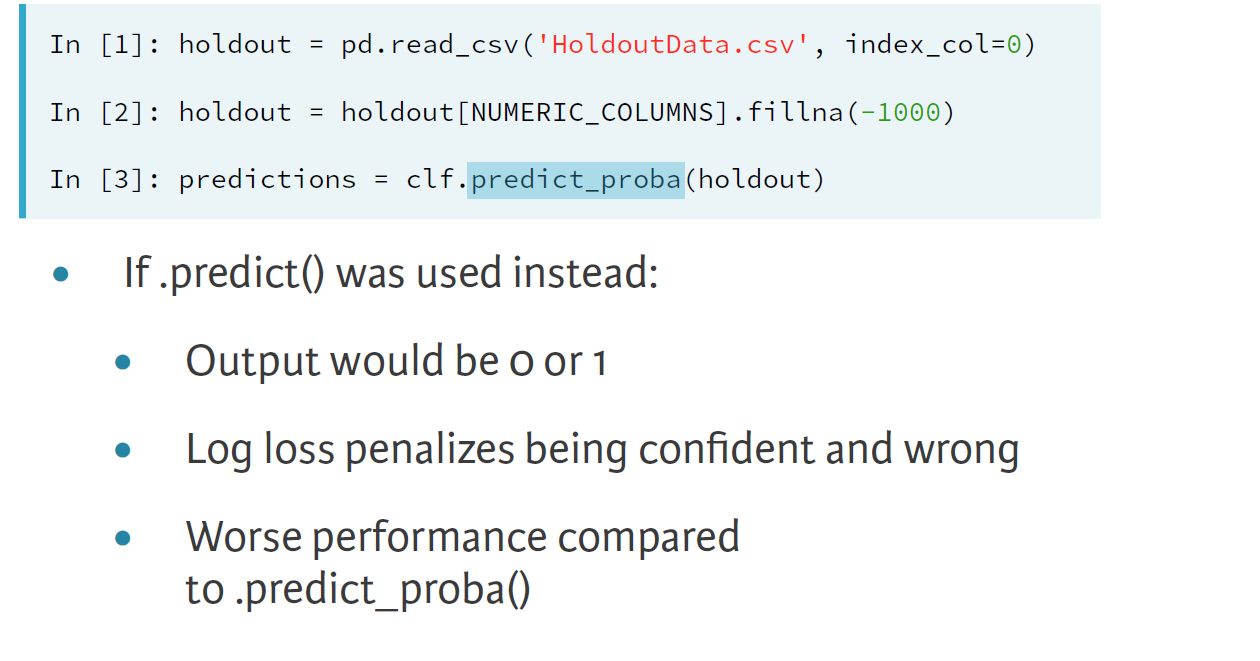

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Use your model to predict values on holdout data</h1><div class=""><p><p>You're ready to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually <em>see</em> the correct labels. This is called the "holdout data."</p>
<p>The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.</p>
<p>Remember that the original goal is to predict the <strong>probability of each label</strong>. In this exercise you'll do just that by using the <code>.predict_proba()</code> method on your trained model.</p>
<p>First, however, you'll need to load the holdout data, which is available in the workspace as the file <code>HoldoutData.csv</code>.</p></div></div></div>

In [20]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('./data/HoldoutData.csv', index_col=0, sep=';')

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

In [21]:
holdout.head()

,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
237,Personal Services - Teachers,Instruction - Regular,NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIME CARD CERTIFIEDAddl,Alternative Schools Instruction,1.750000e+08,NaN,NaN,General Purpose School,NaN
466,Extra Duty/Signing Bonus Pay,Basic Educational Services,NaN,NaN,NaN,General,School,NaN,Instruction,NaN,NaN,4.340000e+10,NaN,NaN,General Fund,NaN
784,OTHER PERSONAL SERVICES,NaN,NaN,SUB TEACHER ALL,NaN,NaN,STAFF DEV AND INSTR MEDIA,0.0,INST STAFF TRAINING SVCS,NaN,NaN,7.510000e+07,NaN,NaN,GENERAL FUND,TEACHER TRAINING
1786,TERMINAL LEAVE VACATION,NaN,NaN,INSPECTOR & SERVICE TECHNICIAN,NaN,NaN,TRANSPORTATION,0.0,PUPIL TRANSPORTATION SERVICES,NaN,NaN,5.270000e+09,NaN,NaN,GENERAL FUND,TERMINAL LEAVE
2643,Extra Duty/Signing Bonus Pay,Undistributed,NaN,NaN,NaN,Principal & Asst. Principal Support,Educator Quality,NaN,Curriculum & Instructional Staff Development,NaN,NaN,4.480000e+10,NaN,NaN,General Fund,NaN


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Writing out your results to a csv for submission</h1><div class=""><p><p>At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a <code>.csv</code> using the <code>.to_csv()</code> method on a pandas DataFrame. Then you'll evaluate your performance according to the LogLoss metric discussed earlier!</p>
<p>You'll need to make sure your submission obeys the <a href="https://www.drivendata.org/competitions/4/page/15/#sub_values" target="_blank" rel="noopener noreferrer">correct format</a>.</p>
<p>To do this, you'll use your <code>predictions</code> values to create a new DataFrame, <code>prediction_df</code>. </p>
<p><strong>Interpreting LogLoss &amp; Beating the Benchmark:</strong> </p>
<p>When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this <em>very basic</em> model performs, compare your score to the <strong>DrivenData benchmark model performance: 2.0455</strong>, which merely submitted uniform probabilities for each class.</p>
<p>Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?</p></div></div>

In [26]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
#score = score_submission(pred_path='predictions.csv')

# Print score
#print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

<div class="dc-u-p-24"><h1 class="dc-h3">Tokenizing text</h1><div class=""><p><p>As we talked about in the video, <a href="http://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html" target="_blank" rel="noopener noreferrer">tokenization</a> is the process of chopping up a character sequence into pieces called <em>tokens</em>. </p>
<p>How do we determine what constitutes a token? Often, tokens are separated by whitespace. But we can specify other delimiters as well. For example, if we decided to tokenize on punctuation, then any punctuation mark would be treated like a whitespace. How we tokenize text in our DataFrame can affect the statistics we use in our model.</p>
<p>A particular cell in our budget DataFrame may have the string content <code>Title I - Disadvantaged Children/Targeted Assistance</code>. The number of n-grams generated by this text data is sensitive to whether or not we tokenize on punctuation, as you'll show in the following exercise.</p>
<p>How many tokens (1-grams) are in the string</p>
<pre><code>Title I - Disadvantaged Children/Targeted Assistance
</code></pre>
<p>if we tokenize on punctuation?</p></div></div>

**6**

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Testing your NLP credentials with n-grams</h1><div class=""><p><p>You're well on your way to NLP superiority. Let's test your mastery of n-grams!</p>
<p>In the workspace, we have the loaded a python list, <code>one_grams</code>, which contains all 1-grams of the string <code>petro-vend fuel and fluids</code>, tokenized on punctuation. Specifically,</p>
<pre><code>one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']
</code></pre>
<p>In this exercise, your job is to determine the <strong>sum</strong> of the sizes of 1-grams, 2-grams and 3-grams generated by the string <code>petro-vend fuel and fluids</code>, tokenized on punctuation.</p>
<p><em>Recall that the n-gram of a sequence consists of all ordered subsequences of length n.</em></p></div></div>

**12**

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Creating a bag-of-words in scikit-learn</h1><div class=""><p><p>In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.</p>
<p>You will focus on one feature only, the <code>Position_Extra</code> column, which describes any additional information not captured by the <code>Position_Type</code> label.</p>
<p>For example, in the Shell you can check out the budget item in row 8960 of the data using <code>df.loc[8960]</code>. Looking at the output reveals that this <code>Object_Description</code> is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.</p>
<p>Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain <em>only</em> alphanumeric characters.</p>
<p>For comparison purposes, the first 15 tokens of <code>vec_basic</code>, which splits <code>df.Position_Extra</code> into tokens when it encounters only <em>whitespace</em> characters, have been printed along with the length of the representation.</p></div></div>

In [32]:
df.iloc[1524]

Function                               Human Resources
Use                                  Business Services
Sharing                        Leadership & Management
Reporting                                   Non-School
Student_Type                                   Poverty
Position_Type                             Non-Position
Object_Type                        Contracted Services
Pre_K                                         NO_LABEL
Operating_Status                     PreK-12 Operating
Object_Description        CONTRACTUAL SERVICES - OTHER
Text_2                                       PERSONNEL
SubFund_Description                 TITLE  CFDA 84.00A
Job_Title_Description                              NaN
Text_3                                             NaN
Text_4                                             NaN
Sub_Object_Description                             NaN
Location_Description         OFFICE OF HUMAN RESOURCES
FTE                                                NaN
Function_D

In [33]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 110 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'assessment', 'assistant', 'asst', 'athletic', 'avg']


Treating only alpha-numeric characters as tokens gives you a smaller number of more meaningful tokens. You've got bag-of-words in the bag!

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Combining text columns for tokenization</h1><div class=""><p><p>In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.</p>
<p>In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. <code>CountVectorizer</code> expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.</p>
<p>In this exercise, you'll complete the function definition <code>combine_text_columns()</code>. When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the <code>.fit_transform()</code> method.</p>
<p>Note that the function uses <code>NUMERIC_COLUMNS</code> and <code>LABELS</code> to determine which columns to drop. These lists have been loaded into the workspace.</p></div></div>

In [34]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">What's in a token?</h1><div class=""><p><p>Now you will use <code>combine_text_columns</code> to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the <code>.fit_transform()</code> method.</p>
<p>You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.</p></div></div>

In [37]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

In [38]:
# Create the text vector
text_vector = combine_text_columns(df)

In [40]:
text_vector.head()

no
198     Supplemental *  Operation and Maintenance of P...
209     REPAIR AND MAINTENANCE SERVICES  PUPIL TRANSPO...
750     Personal Services - Teachers   TCHER 5TH GRADE...
931     General Supplies      General Supplies  Instru...
1524    Supplies and Materials  Community Services    ...
dtype: object

In [41]:
# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 1389 tokens in the dataset
There are 1087 alpha-numeric tokens in the dataset


Wow, you're on your way to complete Data Domination! Notice that tokenizing on alpha-numeric tokens reduced the number of tokens, just as in the last exercise. We'll keep this in mind when building a better model with the Pipeline object next. See you in the next chapter!

## <font color=red>03. Improving your model</font> 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Instantiate pipeline</h1><div class=""><p><p>In order to make your life easier as you start to work with all of the data in your original DataFrame, <code>df</code>, it's time to turn to one of scikit-learn's most useful objects: the <code>Pipeline</code>.</p>
<p>For the next few exercises, you'll reacquaint yourself with pipelines and train a classifier on some synthetic (sample) data of multiple datatypes before using the same techniques on the main dataset.</p>
<p>The sample data is stored in the DataFrame, <code>sample_df</code>, which has three kinds of feature data: numeric, text, and numeric with missing values. It also has a label column with two classes, <code>a</code> and <code>b</code>.</p>
<p>In this exercise, your job is to instantiate a pipeline that trains using the <code>numeric</code> column of the sample data.</p></div></div>

In [48]:
sample_df = pd.read_csv("./data/sample_df.csv", index_col=0, sep=';')

In [49]:
sample_df.head()

,numeric,text,with_missing,label
0,-10.856306,NaN,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,NaN,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [52]:
pd.get_dummies(sample_df['label']).head()

,a,b
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [53]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

In [55]:
# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Preprocessing numeric features</h1><div class=""><p><p>What would have happened if you had included the with <code>'with_missing'</code> column in the last exercise? Without imputing missing values, the pipeline would <strong>not</strong> be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the <code>Imputer()</code> imputation transformer from scikit-learn to fill in missing values in your sample data.</p>
<p>By default, the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html" target="_blank" rel="noopener noreferrer">imputer transformer</a> replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer. </p>
<p>After importing the transformer, you will edit the steps list used in the previous exercise by inserting a <code>(name, transform)</code> tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your <em>preprocessing</em> step is put in the right place.</p>
<p>The <code>sample_df</code> is in the workspace, in case you'd like to take another look. Make sure to select <strong>both</strong> numeric columns- in the previous exercise we couldn't use <code>with_missing</code> because we had no preprocessing step!</p></div></div>

In [56]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


_Text features and feature unions_

<div class="listview__content"><div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Preprocessing text features</h1><div class=""><p><p>Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the <code>text</code> column from the sample data.</p>
<p>To preprocess the text, you'll turn to <code>CountVectorizer()</code> to generate a bag-of-words representation of the data, as in Chapter 2. Using the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html" target="_blank" rel="noopener noreferrer">default</a> arguments, add a <code>(step, transform)</code> tuple to the steps list in your pipeline.</p>
<p>Make sure you select only the text column for splitting your training and test sets.</p>
<p>As usual, your <code>sample_df</code> is ready and waiting in the workspace.</p></div></div></div>

In [61]:
sample_df.text = sample_df.text.fillna('')

In [62]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)



Accuracy on sample data - just text data:  0.808


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Multiple types of processing: FunctionTransformer</h1><div class=""><p><p>The next two exercises will introduce new topics you'll need to make your pipeline truly excel. </p>
<p>Any step in the pipeline <em>must</em> be an object that implements the <code>fit</code> and <code>transform</code> methods. The <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html" target="_blank" rel="noopener noreferrer"><code>FunctionTransformer</code></a> creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.</p>
<p>You are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. You'll create functions that separate the text from the numeric variables and see how the <code>.fit()</code> and <code>.transform()</code> methods work.</p></div></div>

In [65]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Multiple types of processing: FeatureUnion</h1><div class=""><p><p>Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using <code>FeatureUnion()</code>.</p>
<p>These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved.  Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using <code>FeatureUnion()</code>.</p>
<p>In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using <code>FeatureUnion()</code>.</p></div></div>

In [67]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 
                                                               'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Using FunctionTransformer on the main dataset</h1><div class=""><p><p>In this exercise you're going to use <code>FunctionTransformer</code> on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.</p>
<p>Recall from Chapter 2 that you used a custom function <code>combine_text_columns</code> to select and properly format <strong>text data</strong> for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!</p>
<p>Concerning the <strong>numeric data</strong>, you can use <code>NUMERIC_COLUMNS</code>, preloaded as usual, to help design a subset-selecting lambda function.</p>
<p>You're all finished with sample data. The original <code>df</code> is back in the workspace, ready to use.</p></div></div>

In [69]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

In [72]:
# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Add a model to the pipeline</h1><div class=""><p><p>You're about to take everything you've learned so far and implement it in a <code>Pipeline</code> that works with the real, <a href="https://www.drivendata.org/" target="_blank" rel="noopener noreferrer">DrivenData</a> budget line item data you've been exploring.</p>
<p><strong>Surprise!</strong> The structure of the pipeline is exactly the same as earlier in this chapter:</p>
<ul>
<li>the <strong>preprocessing step</strong> uses <code>FeatureUnion</code> to join the results of nested pipelines that each rely on <code>FunctionTransformer</code> to select multiple datatypes</li>
<li>the <strong>model step</strong> stores the model object</li>
</ul>
<p>You can then call familiar methods like <code>.fit()</code> and <code>.score()</code> on the <code>Pipeline</code> object <code>pl</code>.</p></div></div>

In [78]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 198 to 305347
Columns: 105 entries, Function_Aides Compensation to Operating_Status_perating, Not PreK-12
dtypes: uint8(105)
memory usage: 114.2+ KB


In [81]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.0


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Try a different class of model</h1><div class=""><p><p>Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.</p>
<p>Until now, you've been using the model step <code>('clf', OneVsRestClassifier(LogisticRegression()))</code> in your pipeline.</p>
<p>But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.</p>
<p>In particular, you'll swap out the logistic-regression model and replace it with a <a href="https://en.wikipedia.org/wiki/Random_forest" target="_blank" rel="noopener noreferrer">random forest</a> classifier, which uses the statistics of an ensemble of decision trees to generate predictions.</p></div></div>

In [80]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.29333333333333333


Accuracy on budget dataset:  0.261538461538

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Can you adjust the model or parameters to improve accuracy?</h1><div class=""><p><p>You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!</p>
<p>Can you make it better? Try changing the parameter <code>n_estimators</code> of <code>RandomForestClassifier()</code>, whose default value is <code>10</code>, to <code>15</code>.</p></div></div>

In [82]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.30666666666666664


## <font color=red>04 - Learning from the experts </font> 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How many tokens?</h1><div class=""><p><p>Recall from previous chapters that how you tokenize text affects the n-gram statistics used in your model.</p>
<p>Going forward, you'll use alpha-numeric sequences, and <em>only</em> alpha-numeric sequences, as tokens. Alpha-numeric tokens contain only letters a-z and numbers 0-9 (no other characters). In other words, you'll tokenize on punctuation to generate n-gram statistics.</p>
<p>In this exercise, you'll make sure you remember how to tokenize on punctuation.</p>
<p>Assuming we tokenize on punctuation, accepting only alpha-numeric sequences as tokens, how many tokens are in the following string from the main dataset?</p>
<pre><code>'PLANNING,RES,DEV,&amp; EVAL      '
</code></pre>
<p>If you want, we've loaded this string into the workspace as <code>SAMPLE_STRING</code>, but you may not need it to answer the question.</p></div></div>

#### 4, because , and & are not tokens

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Deciding what's a word</h1><div class=""><p><p>Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.</p>
<p>In this exercise, you will use <code>CountVectorizer</code> on the training data <code>X_train</code> (preloaded into the workspace) to see the effect of tokenization on punctuation.</p>
<p>Remember, since <code>CountVectorizer</code> expects a vector, you'll need to use the preloaded function, <code>combine_text_columns</code> before fitting to the training data.</p></div></div>

In [83]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

['00a', '12', '1st', '2nd', '4th', '5th', '70h', '8', 'a', 'ab']


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">N-gram range in scikit-learn</h1><div class=""><p><p>In this exercise you'll insert a <code>CountVectorizer</code> instance into your pipeline for the main dataset, and compute multiple n-gram features to be used in the model.</p>
<p>In order to look for ngram relationships at multiple scales, you will use the <code>ngram_range</code> parameter as Peter discussed in the video. </p>
<p><strong>Special functions:</strong> You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the <code>dim_red</code> step following the <code>vectorizer</code> step , and the <code>scale</code> step preceeding the <code>clf</code> (classification) step.</p>
<p>These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a <a href="https://en.wikipedia.org/wiki/Dimensionality_reduction" target="_blank" rel="noopener noreferrer">dimensionality reduction</a> technique, which is what the <code>dim_red</code> step does, and we have to <a href="https://en.wikipedia.org/wiki/Feature_scaling" target="_blank" rel="noopener noreferrer">scale the features</a> to lie between -1 and 1, which is what the <code>scale</code> step does.</p>
<p>The <code>dim_red</code> step uses a scikit-learn function called <code>SelectKBest()</code>, applying something called the <a href="https://en.wikipedia.org/wiki/Chi-squared_test" target="_blank" rel="noopener noreferrer">chi-squared test</a> to select the K "best" features. The <code>scale</code> step uses a scikit-learn function called <code>MaxAbsScaler()</code> in order to squash the relevant features into the interval -1 to 1.</p>
<p>You won't need to do anything extra with these functions here, just complete the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!</p></div></div>

In [84]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

<div class="dc-u-p-24"><h1 class="dc-h3">Which models of the data include interaction terms?</h1><div class=""><p><p>Recall from the video that interaction terms involve products of features.</p>
<p>Suppose we have two features <code>x</code> and <code>y</code>, and we use models that process the features as follows:</p>
<ol>
<li>βx + βy + ββ</li>
<li>βxy + βx + βy</li>
<li>βx + βy + βx^2 + βy^2</li>
</ol>
<p>where β is a coefficient in your model (not a feature).</p>
<p>Which expression(s) include interaction terms?</p></div></div>

#### The second expression.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Implement interaction modeling in scikit-learn</h1><div class=""><p><p>It's time to add interaction features to your model. The <code>PolynomialFeatures</code> object in scikit-learn does just that, but here you're going to use a custom interaction object, <code>SparseInteractions</code>. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.</p>
<p><code>SparseInteractions</code> does the same thing as <code>PolynomialFeatures</code>, but it uses sparse matrices to do so. You can get the code for <code>SparseInteractions</code> at <a href="https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py" target="_blank" rel="noopener noreferrer">this GitHub Gist</a>.</p>
<p><code>PolynomialFeatures</code> and <code>SparseInteractions</code> both take the argument <code>degree</code>, which tells them what polynomial degree of interactions to compute.</p>
<p>You're going to consider interaction terms of <code>degree=2</code> in your pipeline. You will insert these steps <em>after</em> the preprocessing steps you've built out so far, but <em>before</em> the classifier steps.</p>
<p>Pipelines with interaction terms take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!</p></div></div>

In [88]:
from SparseInteractions import SparseInteractions

In [89]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                 http://localhost:8888/notebooks/03%20Datacamp/01_Courses%20ok/-19%20Machine%20Learning%20with%20the%20Experts%20School%20Budgets/19%20Machine%20Learning%20with%20the%20Experts%20School%20Budgets.ipynb#   ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Why is hashing a useful trick?</h1><div class=""><p><p>In the video, Peter explained that a <a href="https://en.wikipedia.org/wiki/Feature_hashing#Feature_vectorization_using_the_hashing_trick" target="_blank" rel="noopener noreferrer">hash</a> function takes an input, in your case a token, and outputs a hash value. For example, the input may  be a string and the hash value may be an integer.</p>
<p>We've loaded a familiar python datatype, a dictionary called <code>hash_dict</code>, that makes this mapping concept a bit more explicit. In fact, <a href="http://stackoverflow.com/questions/114830/is-a-python-dictionary-an-example-of-a-hash-table" target="_blank" rel="noopener noreferrer">python dictionaries ARE hash tables</a>!</p>
<p>Print <code>hash_dict</code> in the IPython Shell to get a sense of how strings can be mapped to integers.</p>
<p>By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on large datasets.</p>
<p>Using the above information, answer the following:</p>
<p>Why is hashing a useful trick?</p></div></div>

##### Some problems are memory-bound and not easily parallelizable, and hashing enforces a fixed length computation instead of using a mutable datatype (like a dictionary).

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Implementing the hashing trick in scikit-learn</h1><div class=""><p><p>In this exercise you will check out the scikit-learn implementation of <code>HashingVectorizer</code> before adding it to your pipeline later.</p>
<p>As you saw in the video, <code>HashingVectorizer</code> acts just like <code>CountVectorizer</code> in that it can accept <code>token_pattern</code> and <code>ngram_range</code> parameters. The important difference is that it creates hash values from the text, so that we get all the computational advantages of hashing!</p></div></div>

In [85]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

          0
0  0.164399
1 -0.493197
2 -0.328798
3  0.164399
4  0.164399


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Build the winning model</h1><div class=""><p><p>You have arrived! This is where all of your hard work pays off. It's time to build the model that won DrivenData's competition.</p>
<p>You've constructed a robust, powerful pipeline capable of processing training <em>and</em> testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!</p>
<p>All you need to do is add the <code>HashingVectorizer</code> step to the pipeline to replace the <code>CountVectorizer</code> step.</p>
<p>The parameters <code>non_negative=True</code>, <code>norm=None</code>, and  <code>binary=False</code> make the <code>HashingVectorizer</code> perform similarly to the default settings on the <code>CountVectorizer</code> so you can just replace one with the other.</p></div></div>

In [90]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

<div class="dc-u-p-24"><h1 class="dc-h3">What tactics got the winner the best score?</h1><div class=""><p><p>Now you've implemented the winning model from start to finish. If you want to use this model locally, <a href="https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb" target="_blank" rel="noopener noreferrer">this Jupyter notebook</a> contains all the code you've worked so hard on. You can now take that code and build on it!</p>
<p>Let's take a moment to reflect on why this model did so well. What tactics got the winner the best score?</p></div></div>

##### The winner used skillful NLP, efficient computation, and simple but powerful stats tricks to master the budget data.